In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
data = pd.read_csv('data.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [9]:
data.head()

data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [16]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

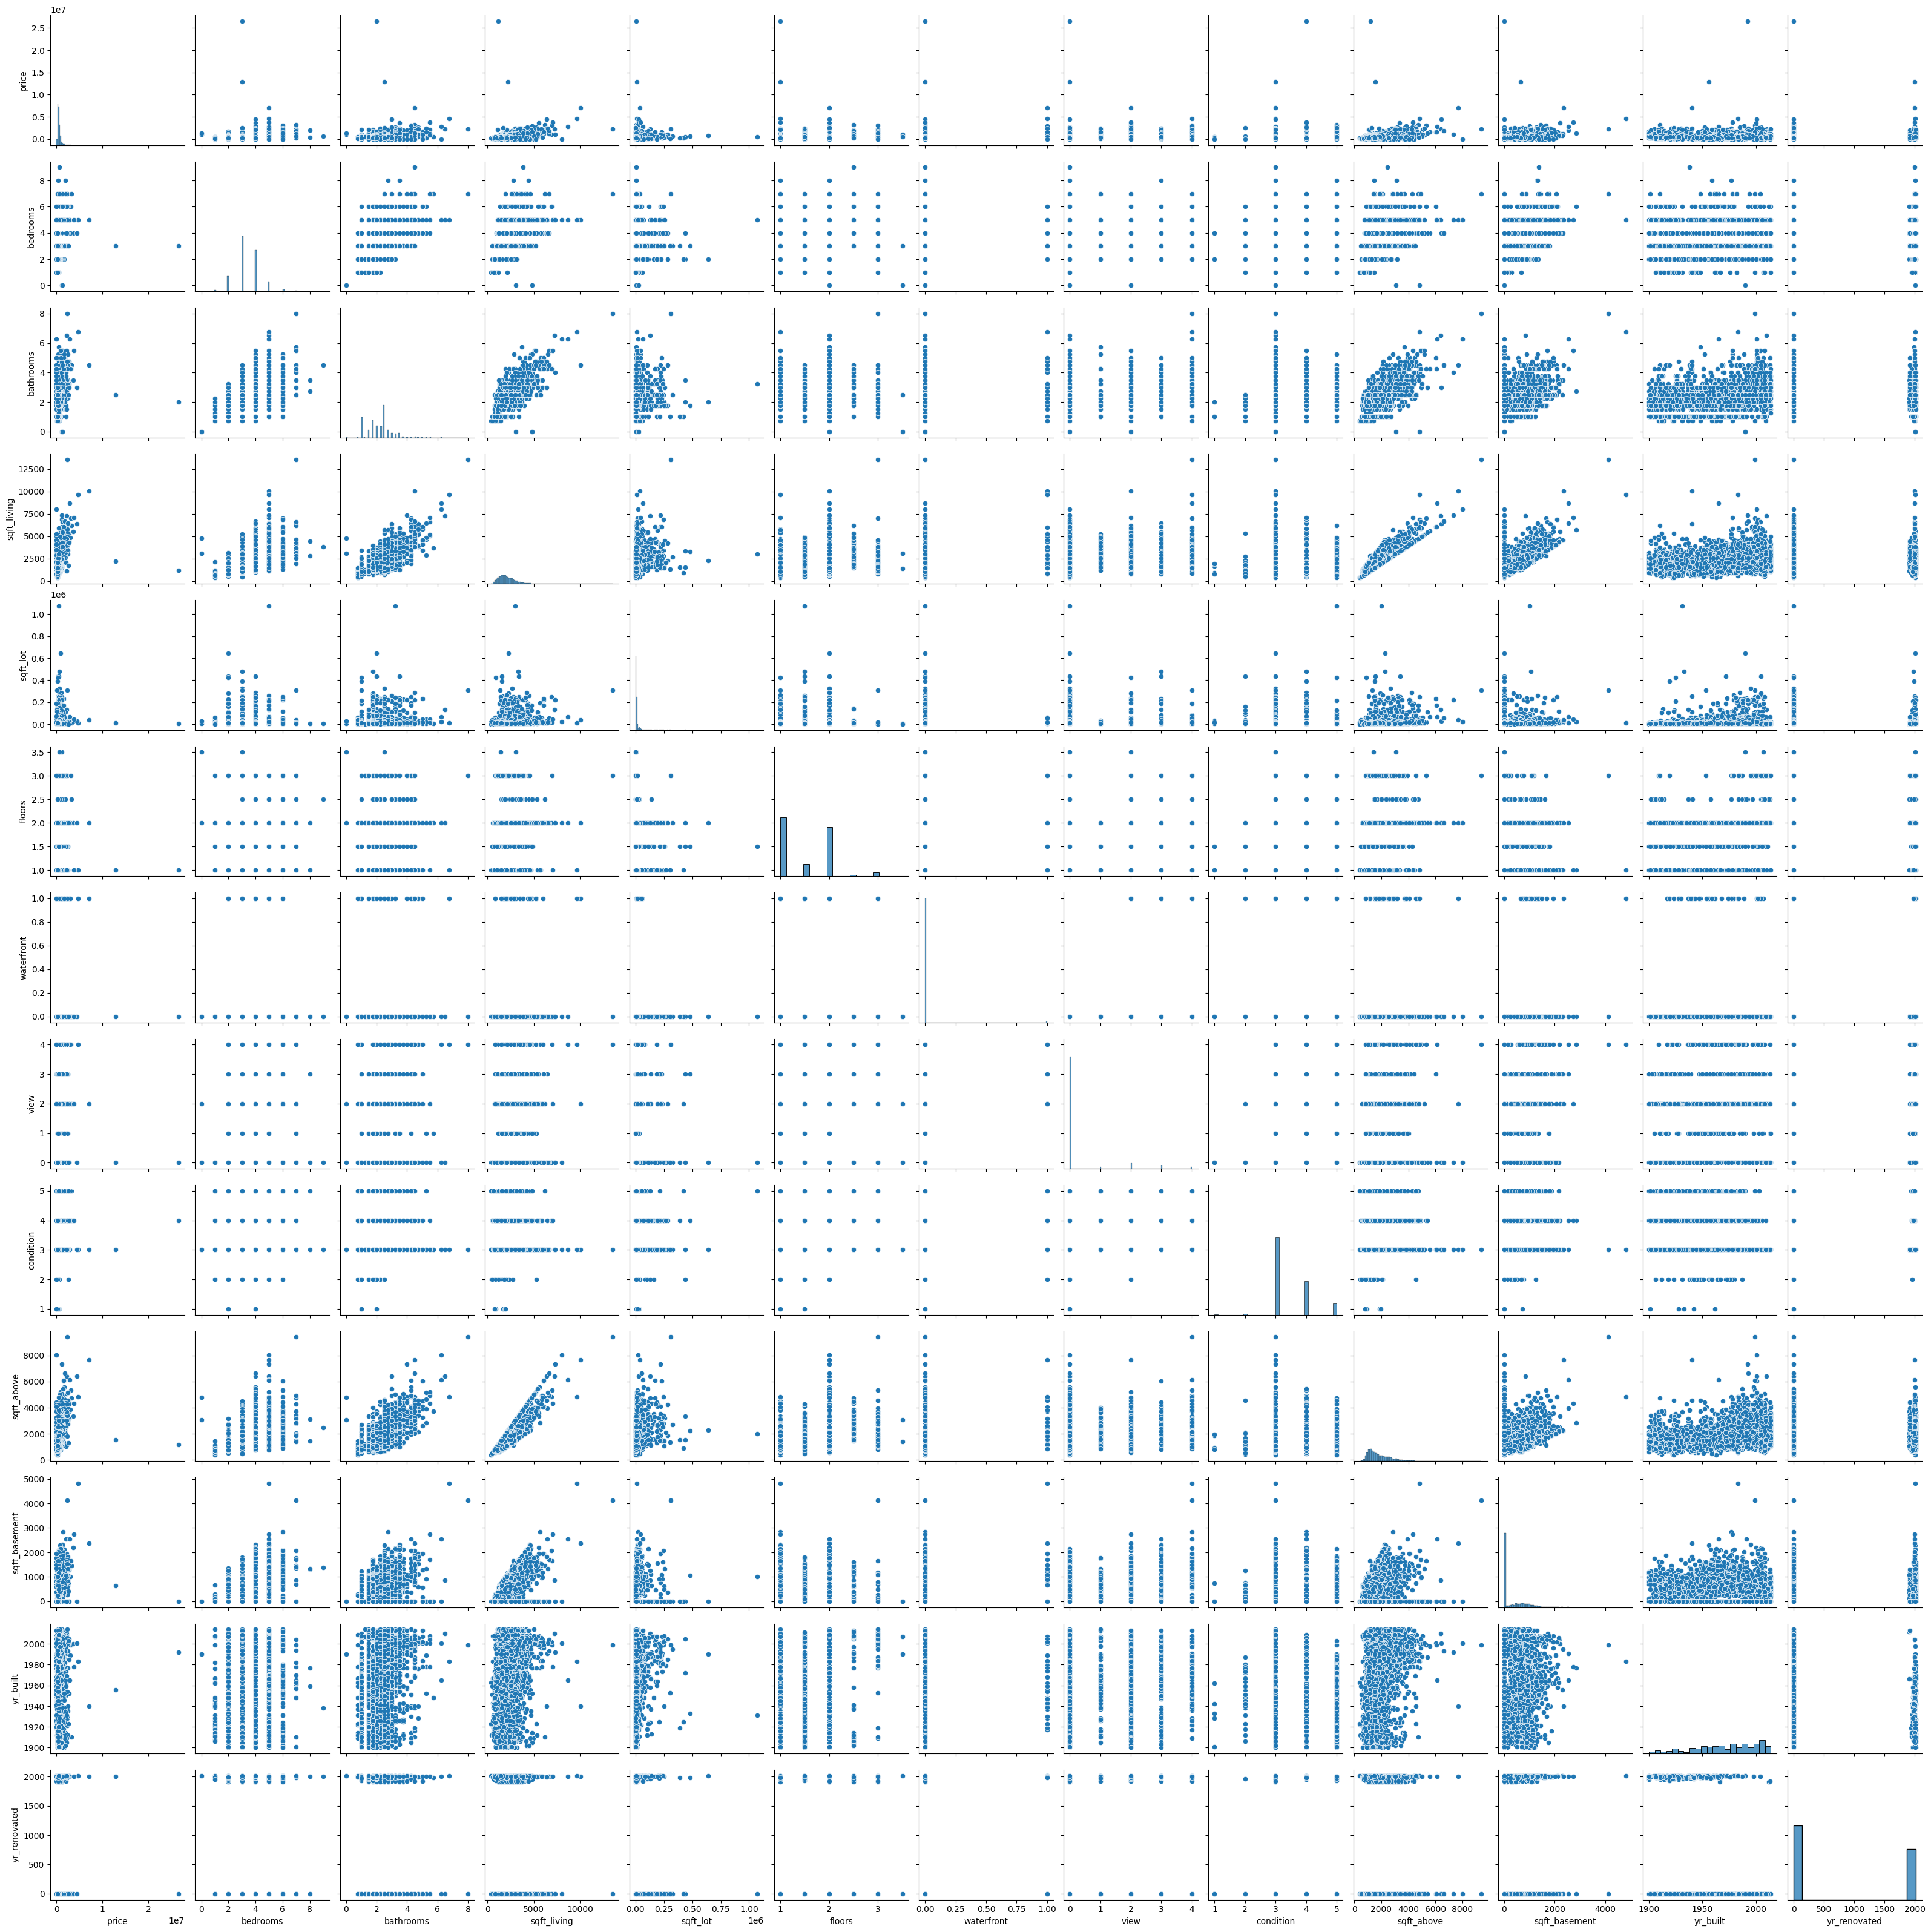

In [10]:
sns.pairplot(data)

<Axes: >

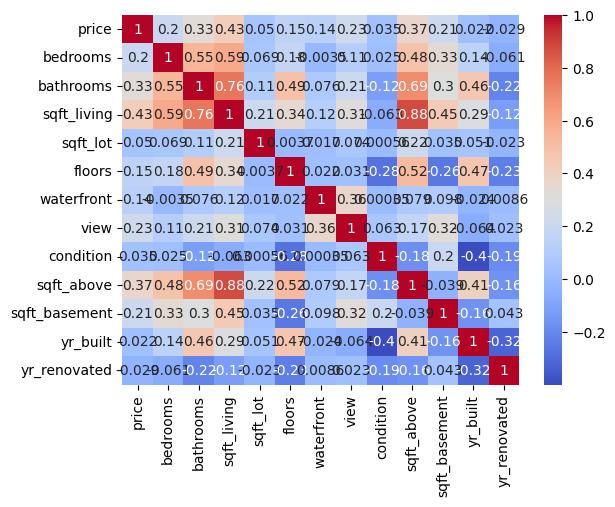

In [14]:
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')

In [17]:
x = data[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country']]
y = data['price']


In [18]:
from sklearn.model_selection import train_test_split


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [24]:
cols_to_drop = ['date', 'street', 'city', 'statezip', 'country']
x_train_num = x_train.drop(columns=cols_to_drop)
lr.fit(x_train_num, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
coeff_data = pd.DataFrame(lr.coef_, x_train_num.columns, columns=['Coefficient'])


In [26]:
coeff_data

,Coefficient
price,1.000000e+00
bedrooms,-2.654939e-12
bathrooms,1.631186e-12
sqft_living,6.673748e-15
sqft_lot,1.839153e-16
floors,9.352966e-12
waterfront,-1.960569e-11
view,7.807885e-12
condition,1.889142e-12
sqft_above,1.909570e-15


In [27]:
predict_train = lr.predict(x_train_num)

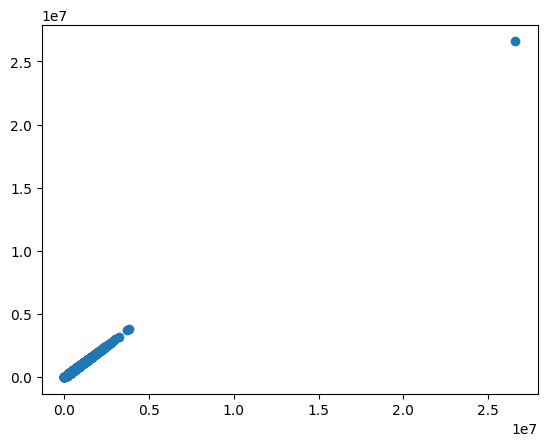

In [28]:
plt.scatter(y_train, predict_train)

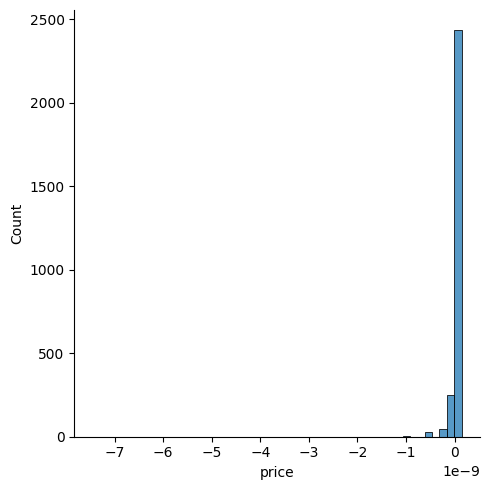

In [29]:
sns.displot(y_train - predict_train, bins=50)

Mean Absolute Error: 4.7945230806210194e-11
Mean Squared Error: 2.707737446986838e-20
R^2 Score: 1.0


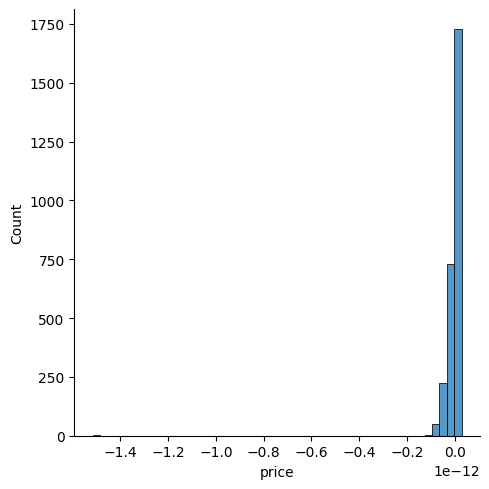

In [30]:
predication_in_percentage = (predict_train - y_train) / y_train * 100

sns.displot(predication_in_percentage, bins=50)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_train, predict_train)
mse = mean_squared_error(y_train, predict_train)
r2 = r2_score(y_train, predict_train)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

In [33]:
test_accuracy = lr.score(x_test.drop(columns=cols_to_drop), y_test)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test R^2 Score: {r2_score(y_test, lr.predict(x_test.drop(columns=cols_to_drop)))}')
print("test_accuracy in percentage: ", test_accuracy * 100, "%")

Test Accuracy: 1.0
Test R^2 Score: 1.0
test_accuracy in percentage:  100.0 %
